# Plotting tutorial

Properly graphing experiment outcomes is an extremely important skill for any Master of Science. 

In this example, we will take a look at how we can plot some data using NumPy and matplotlib in Python.

## Import numpy and matplotlib
We first import numpy and matplotlib, as these are the libraries we need to use when plotting stuff, and maybe doing some calculations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)

## Prepare your data set
Suppose we are interested in the run time of a program versus its input size, on a specific machine.

You might think: "a computer operates in a completely deterministic way, thus I can exactly calculate the run time of my program". 
Unfortunately this might only be true in theory. A modern computing system is so complex that there are a virtually infinite number of parameters to take into account. Examples include:
* Processor
* Memory
* Mainboard chipset
* Disk
* Operating system
* Compiler
* Cache state
* Other active processes
* etc... (hundreds of others)

In practise, this means we just consider the run time to be of a partially stochastic nature.

To smooth out any noise, we __always__ repeat an experiment multiple times and report __at least__ the average run time.

In the code below, we first fill in problem sizes to be plotted on the X axis. 

Then, we fill in all our measurements in a 2D-array and calculate the mean run time for each problem size.

In [2]:
# Read the data file
data_lines = open("vec.csv", "r").readlines();

# Remove the header from the csv file
data_lines.pop(0)

# Figure out the number of columns
num_cols = data_lines[1].count(',')

# Get the problem sizes from the first column
problem_sizes = np.genfromtxt(data_lines, delimiter=",", usecols=1, dtype=np.uint)

# Get the results from the other columns. For this example, we are interested
# in the float run-times only.
# Our run times start in the fourth column and we've made four repeats.
measurements = np.genfromtxt(data_lines, delimiter=",", usecols=range(4, 8))

print("Problem sizes:")
print(problem_sizes)
print("Measurements:")
print(measurements)

Problem sizes:
[     1      2      4      8     16     32     64    128    256    512
   1024   2048   4096   8192  16384  32768  65536 131072 262144 524288]
Measurements:
[[1.86000e-06 4.54000e-07 3.97000e-07 4.23000e-07]
 [4.29000e-07 4.00000e-07 4.23000e-07 3.94000e-07]
 [4.30000e-07 3.97000e-07 3.99000e-07 4.24000e-07]
 [4.70000e-07 4.25000e-07 4.20000e-07 4.17000e-07]
 [4.51000e-07 4.34000e-07 4.26000e-07 4.28000e-07]
 [4.47000e-07 4.49000e-07 4.46000e-07 4.42000e-07]
 [4.63000e-07 4.42000e-07 4.46000e-07 4.44000e-07]
 [5.50000e-07 5.13000e-07 4.91000e-07 4.96000e-07]
 [6.38000e-07 6.38000e-07 6.46000e-07 6.21000e-07]
 [8.88000e-07 8.99000e-07 8.89000e-07 9.10000e-07]
 [1.40100e-06 1.40400e-06 1.41700e-06 1.39400e-06]
 [2.50400e-06 2.43800e-06 2.42100e-06 2.45000e-06]
 [4.59000e-06 4.49000e-06 4.48200e-06 4.47900e-06]
 [8.91800e-06 8.58300e-06 8.57700e-06 8.57700e-06]
 [1.75490e-05 1.68840e-05 1.68450e-05 1.68200e-05]
 [3.43990e-05 3.38960e-05 3.38810e-05 3.38800e-05]
 [7.20750e-0

In [3]:
# Calculate the means along the horizontal axis
means = measurements.mean(axis=1)

print("These are the means for each experiment:")
means

These are the means for each experiment:


array([7.8350000e-07, 4.1150000e-07, 4.1250000e-07, 4.3300000e-07,
       4.3475000e-07, 4.4600000e-07, 4.4875000e-07, 5.1250000e-07,
       6.3575000e-07, 8.9650000e-07, 1.4040000e-06, 2.4532500e-06,
       4.5102500e-06, 8.6637500e-06, 1.7024500e-05, 3.4014000e-05,
       7.3454750e-05, 1.3487825e-04, 2.6668800e-04, 5.2950925e-04])

## Plotting your data set
Now that we've prepared the data that we want to plot, let's naively start plotting using pyplot.

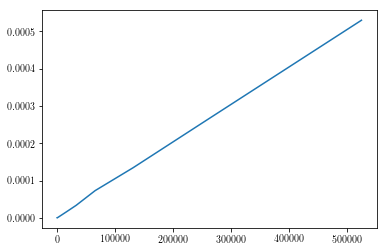

In [4]:
fig, ax = plt.subplots()
plot = ax.plot(problem_sizes, means)
plt.show()

Many things are very wrong with this plot. Sure, it's geometrically correct, but is it clearly conveying the information that we want to show to whomever we are going to report to?

No. First of all, we made measurements at a discrete number of problem sizes and calculated the mean run time for each experiment. This graph currently implies we performed some continuous measurement over the X axis. To make our means stand out more clearly we should add markers. This will show whoever reads the graph that we made discrete measurements and the line is just an interpolation.

In general, making things as clear as possible will make people we report to happy, as they need less time to understand what we are trying to say. This in turn will make us happy, as we will receive higher grades, salaries, etc... For example, if you would use the above plot in your master thesis, you are surely not going to get an approval for graduation. Time to step up our game!

Let's first introduce the markers and see if the result is clear enough to report.

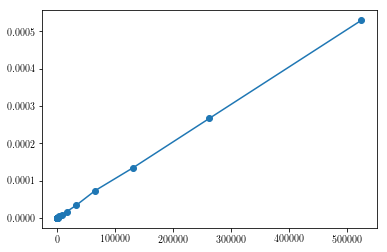

In [5]:
# To prevent making a new plot we can apply:
for line in plot:
    line.set_marker('o')

# However, normally you can just plot it like this right away with:
#   plot = ax.plot(problem_sizes, means, marker='o')

# Show the plot
fig

This is better, but still not every clear. We have been growing the problem size exponentially. Because the plot uses linear axes, the results of the experiments with small problem sizes are somewhat pushed towards the origin, making them hard to read. We should therefore use log scale for the X axis.

The default base for log scale is 10. We have grown the problem size exponentially using base 2, so it makes sense to apply base 2 to the X axis as well.

We also change the x tick positions (where the labels on the x-axis) to be at our problem sizes. You can do that as long as the x-tick labels on the X axis do not start overlapping and become unreadable. In this case we only have 10 x-ticks, so it's still redable.

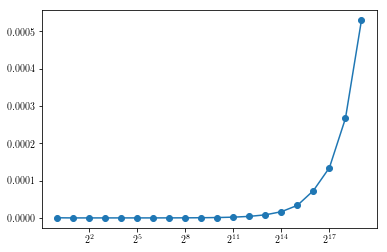

In [6]:
ax.set_xscale('log', basex=2)
#ax.set_xticks(problem_sizes)
fig

It has now become easier to discern the lower problem size outcomes from the higher problem size outcomes. However, to fit the longest run time in the graph, the Y axis has to span a huge range. This causes the short run times to be not clearly readable. It's a good idea to use log scale for the Y axis as well.

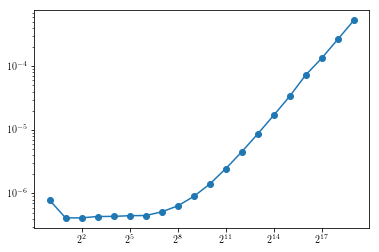

In [7]:
ax.set_yscale('log')
fig

This looks much better, although for any plot it should always be clear what the axis represent. When you want to inspect the graph in more detail, a grid is also nice to have.

It should also have a title, but we will do that in the report through LaTeX.

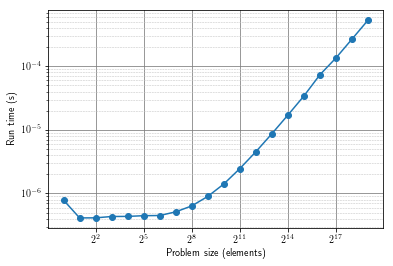

In [8]:
# Set axis labels
ax.set(xlabel='Problem size (elements)', ylabel='Run time (s)')

# Enable a major and minor grid. 
# Only use a minor grid when it makes the graph more clear (e.g. the major ticks are very far apart).
ax.grid(which='major', linestyle='-', color='gray')
ax.grid(which='minor', linestyle='--', linewidth=0.5, color='silver')

fig

We now have a nice plot that is both readable and clear. It is now more likely that whoever has to inspect the plot will be happy! 

Let's output it as a PDF, so we don't get nasty pixely images, but a nicely vectorized version of our plot.

In [9]:
fig.savefig("lab1a.pdf", bbox_inches='tight')

You can now import the PDF into LaTeX.